In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'



In [2]:
def show_missing_rate(df: pd.DataFrame):
    missing = pd.DataFrame(df.isnull().sum()).reset_index()
    missing.columns = ['Feature', 'Missing_Percent(%)']
    missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
    print(missing.loc[missing['Missing_Percent(%)']>0,:])

## Drop some column to simplify the question

drop string type data in order to avoid processing natural language and focus on numeric data


## Deal with missing value

In [3]:
import pandas as pd

ori_data = pd.read_csv('./data/US_Accidents_March23.csv')
# ori_data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')
print(ori_data.head())
print(ori_data.shape[0])

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [4]:
show_missing_rate(ori_data)

                  Feature  Missing_Percent(%)
7                 End_Lat           44.029355
8                 End_Lng           44.029355
10            Description            0.000065
11                 Street            0.140637
12                   City            0.003274
15                Zipcode            0.024779
17               Timezone            0.101030
18           Airport_Code            0.292881
19      Weather_Timestamp            1.555666
20         Temperature(F)            2.120143
21          Wind_Chill(F)           25.865904
22            Humidity(%)            2.253301
23           Pressure(in)            1.820288
24         Visibility(mi)            2.291524
25         Wind_Direction            2.267043
26        Wind_Speed(mph)            7.391355
27      Precipitation(in)           28.512858
28      Weather_Condition            2.244438
42         Sunrise_Sunset            0.300787
43         Civil_Twilight            0.300787
44      Nautical_Twilight         

# Drop the column that has too many missing values 
In order to simplify the problem, also drop the geographical information like latitude and longtitude, street name, zipcode, timezone, country.

Drop Source and Description because those are useless

In [5]:
drop_list = [
    'Source', 'Description', 'End_Lat', 'End_Lng',
    'Zipcode', 'Timezone', 'Airport_Code',
    'Turning_Loop', 'Country', 'Precipitation(in)', 'Wind_Chill(F)'
]
ori_data.drop(drop_list,axis=1, inplace=True)
print(f'Total number of columns: {len(ori_data.columns.to_list())}')

Total number of columns: 35


In [6]:
ori_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,I-70 E,Dayton,Montgomery,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,Franklin,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,...,False,False,False,False,False,True,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,...,False,False,False,False,False,True,Day,Day,Day,Day


# Accumulate twilight data by 4 kind of twilight source
drop those rows has no four twilight data

In [7]:
#drop those rows has no four twilight data, fortunately the twilight will be 4 null at the same time
#so only choose one column to find out the row has null twilight  will be ok
ori_data.drop(ori_data[ori_data['Nautical_Twilight'].isnull()].index, inplace=True)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
7              Street            0.138764
11  Weather_Timestamp            1.524747
12     Temperature(F)            2.088928
13        Humidity(%)            2.221839
14       Pressure(in)            1.788635
15     Visibility(mi)            2.260255
16     Wind_Direction            2.235012
17    Wind_Speed(mph)            7.374589
18  Weather_Condition            2.213261


## insert a twilight column 1:Day, 0:Night

In [8]:
ori_data.insert(loc=1, column='Twilight', value=[1]*len(ori_data))
ori_data['Twilight'].describe()

count    7705148.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: Twilight, dtype: float64

### Set Day to 1, Night to 0

In [9]:
twilight_list = ['Sunrise_Sunset', 'Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight']
#accumulate the twilight data
for tl in twilight_list:
    ori_data[tl] = ori_data[tl].apply(lambda x: 1 if x == 'Day' else 0)
ori_data.head()

,ID,Twilight,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,I-70 E,Dayton,...,False,False,False,False,False,False,0,0,0,0
1,A-2,1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,...,False,False,False,False,False,False,0,0,0,1
2,A-3,1,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,Williamsburg,...,False,False,False,False,False,True,0,0,1,1
3,A-4,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,Dayton,...,False,False,False,False,False,False,0,1,1,1
4,A-5,1,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,...,False,False,False,False,False,True,1,1,1,1


# Sum up the value across 4 twilight and ensemble the value in new 'Twilight' column

show original twilight only have value 1 for all rows

In [10]:
ori_data['Twilight'].unique()

array([1], dtype=int64)

In [11]:
import random
def set_day_or_night(x):
    if x > 2:
        return 1
    elif x == 2:
        if random.random() > 0.5:
            return 0
        else:
            return 1
    else:
        return 0

    
ori_data['Twilight'] = ori_data[twilight_list].sum(axis=1).apply(set_day_or_night)
ori_data.drop(twilight_list, axis=1, inplace=True)
ori_data.head()

,ID,Twilight,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,A-1,0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,I-70 E,Dayton,...,False,False,False,False,False,False,False,False,False,False
1,A-2,0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,...,False,False,False,False,False,False,False,False,False,False
2,A-3,0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,Williamsburg,...,False,False,False,False,False,False,False,False,False,True
3,A-4,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,Dayton,...,False,False,False,False,False,False,False,False,False,False
4,A-5,1,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,...,False,False,False,False,False,False,False,False,False,True


# Calculate accident elapse time and insert new column

In [12]:
ori_data['Start_Time']=pd.to_datetime(ori_data['Start_Time'], format='ISO8601')
ori_data['End_Time']=pd.to_datetime(ori_data['End_Time'], format='ISO8601')
ori_data['Hour'] = ori_data['Start_Time'].dt.hour
ori_data['Minute'] = ori_data['Start_Time'].dt.minute
ori_data['Day'] = ori_data['Start_Time'].dt.day
ori_data['Month'] = ori_data['Start_Time'].dt.month
ori_data['Weekday'] = ori_data['Start_Time'].dt.weekday
ori_data['Year'] = ori_data['Start_Time'].dt.year
ori_data['elapsed_time'] = ori_data['End_Time'] - ori_data['Start_Time']
ori_data['elapsed_time'] = ori_data['elapsed_time']/np.timedelta64(1,'m')
ori_data.drop('Start_Time', axis=1, inplace=True)
ori_data.drop('End_Time', axis=1, inplace=True)
ori_data.head()

,ID,Twilight,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,...,Stop,Traffic_Calming,Traffic_Signal,Hour,Minute,Day,Month,Weekday,Year,elapsed_time
0,A-1,0,3,39.865147,-84.058723,0.01,I-70 E,Dayton,Montgomery,OH,...,False,False,False,5,46,8,2,0,2016,314.0
1,A-2,0,2,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,Franklin,OH,...,False,False,False,6,7,8,2,0,2016,30.0
2,A-3,0,2,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,OH,...,False,False,True,6,49,8,2,0,2016,30.0
3,A-4,1,3,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,OH,...,False,False,False,7,23,8,2,0,2016,30.0
4,A-5,1,2,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,...,False,False,True,7,39,8,2,0,2016,30.0


# Sort by timestamp and county and fill in NaN value for those continuous data type
For instance: 'Temperature'

### Fix naming of categorical features

`County`

In [13]:
# remove unnecessary parentheses and 'city'
ori_data['County'] = ori_data['County'].str.replace(r'\(|\)|city', '', case=False, regex=True)
ori_data['County'] = ori_data['County'].str.strip()

### Drop rows that could not be filled by interpolation

keep rows which values of specific features whithin a group is greater or equal to 1

In [14]:
ori_data = ori_data.groupby('County').filter(lambda x: x['Temperature(F)'].notna().sum() >= 1 and x['Humidity(%)'].notna().sum() >= 1 and x['Visibility(mi)'].notna().sum() >= 1 and x['Wind_Speed(mph)'].notna().sum() >= 1 and x['Pressure(in)'].notna().sum() >= 1)

Convert string timestamp to type TimeStampseries for sorting

In [15]:
ori_data.drop(ori_data[ori_data['Weather_Timestamp'].isna()].index, inplace=True)
ori_data['Weather_Timestamp'] = pd.to_datetime(ori_data['Weather_Timestamp'])
ori_data.sort_values('Weather_Timestamp', inplace=True)

In [16]:

def fill_in_missing_value(missing_column: str, ori_data: pd.DataFrame):
    # interpolate missing data and then fill in the rest(usaully start or end of the data)
    ori_data[missing_column] = ori_data.groupby('County')[missing_column].transform(lambda x: x.interpolate(method='nearest').bfill().ffill())
            

In [17]:
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
11     Temperature(F)            0.572912
12        Humidity(%)            0.707857
13       Pressure(in)            0.267979
14     Visibility(mi)            0.745379
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [18]:
fill_in_missing_value('Temperature(F)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
12        Humidity(%)            0.707857
13       Pressure(in)            0.267979
14     Visibility(mi)            0.745379
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [19]:
fill_in_missing_value('Humidity(%)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
13       Pressure(in)            0.267979
14     Visibility(mi)            0.745379
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [20]:
fill_in_missing_value('Visibility(mi)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
13       Pressure(in)            0.267979
15     Wind_Direction            0.721261
16    Wind_Speed(mph)            5.940471
17  Weather_Condition            0.697683


In [21]:
fill_in_missing_value('Wind_Speed(mph)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
13       Pressure(in)            0.267979
15     Wind_Direction            0.721261
17  Weather_Condition            0.697683


In [22]:
fill_in_missing_value('Pressure(in)', ori_data)
show_missing_rate(ori_data)

              Feature  Missing_Percent(%)
6              Street            0.138108
15     Wind_Direction            0.721261
17  Weather_Condition            0.697683


# Handle Wind direction and weather condition

In [23]:
wind_serie = ori_data['Wind_Direction']
ori_data.drop(wind_serie[wind_serie.isnull()].index, inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['Calm'], value='CALM', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['SSW', 'SSE', 'South'], value='S', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['NNW', 'NNE', 'North'], value='N', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['ESE', 'ENE', 'East'], value='E', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['WSW', 'WNW', 'West'], value='W', inplace=True)
ori_data['Wind_Direction'].replace(to_replace=['Variable'], value='VAR', inplace=True)
print(ori_data['Wind_Direction'].unique())
show_missing_rate(ori_data)

['N' 'SW' 'CALM' 'W' 'S' 'NW' 'VAR' 'SE' 'E' 'NE']
              Feature  Missing_Percent(%)
6              Street            0.137571
17  Weather_Condition            0.510141


In [24]:
weather_serie = ori_data['Weather_Condition']
ori_data.drop(weather_serie[weather_serie.isnull()].index, inplace=True)
show_missing_rate(ori_data)

  Feature  Missing_Percent(%)
6  Street            0.137903


In [25]:
ori_data.drop(ori_data[ori_data['Street'].isnull()].index, inplace=True)
show_missing_rate(ori_data)

Empty DataFrame
Columns: [Feature, Missing_Percent(%)]
Index: []


In [26]:
ori_data.head()

,ID,Twilight,Severity,Start_Lat,Start_Lng,Distance(mi),Street,City,County,State,...,Stop,Traffic_Calming,Traffic_Signal,Hour,Minute,Day,Month,Weekday,Year,elapsed_time
3571330,A-3581213,0,4,40.630609,-75.470606,0.061,US-22 E,Whitehall,Lehigh,PA,...,False,False,False,20,18,14,1,3,2016,616470.500000
3562512,A-3572395,0,4,40.630609,-75.470606,0.061,US-22 E,Whitehall,Lehigh,PA,...,False,False,False,20,18,14,1,3,2016,577699.450000
3562358,A-3572241,0,4,40.630609,-75.470606,0.061,US-22 E,Whitehall,Lehigh,PA,...,False,False,False,20,18,14,1,3,2016,576183.450000
3548830,A-3558713,0,4,40.630609,-75.470606,0.061,US-22 E,Whitehall,Lehigh,PA,...,False,False,False,20,18,14,1,3,2016,549697.183333
3548817,A-3558700,0,4,40.630609,-75.470606,0.061,US-22 E,Whitehall,Lehigh,PA,...,False,False,False,20,18,14,1,3,2016,549675.483333


In [27]:
print(ori_data.shape[0])
ori_data.to_csv('./data/v2.csv', index = False)

7484058


In [28]:
ori_data = pd.read_csv('./data/v2.csv')

# Data visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
ori_data = pd.read_csv('./data/v2.csv', index_col=False)

In [3]:
ori_data.head()

,Unnamed: 0,ID,Twilight,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,3571330,A-3581213,0,4,2016-01-14 20:18:33,2017-03-17 22:49:03,40.630609,-75.470606,0.061,US-22 E,...,False,False,False,False,False,0,0,0,0,616470.500000
1,3562512,A-3572395,0,4,2016-01-14 20:18:33,2017-02-19 00:38:00,40.630609,-75.470606,0.061,US-22 E,...,False,False,False,False,False,0,0,0,0,577699.450000
2,3562358,A-3572241,0,4,2016-01-14 20:18:33,2017-02-17 23:22:00,40.630609,-75.470606,0.061,US-22 E,...,False,False,False,False,False,0,0,0,0,576183.450000
3,3548830,A-3558713,0,4,2016-01-14 20:18:33,2017-01-30 13:55:44,40.630609,-75.470606,0.061,US-22 E,...,False,False,False,False,False,0,0,0,0,549697.183333
4,3548817,A-3558700,0,4,2016-01-14 20:18:33,2017-01-30 13:34:02,40.630609,-75.470606,0.061,US-22 E,...,False,False,False,False,False,0,0,0,0,549675.483333


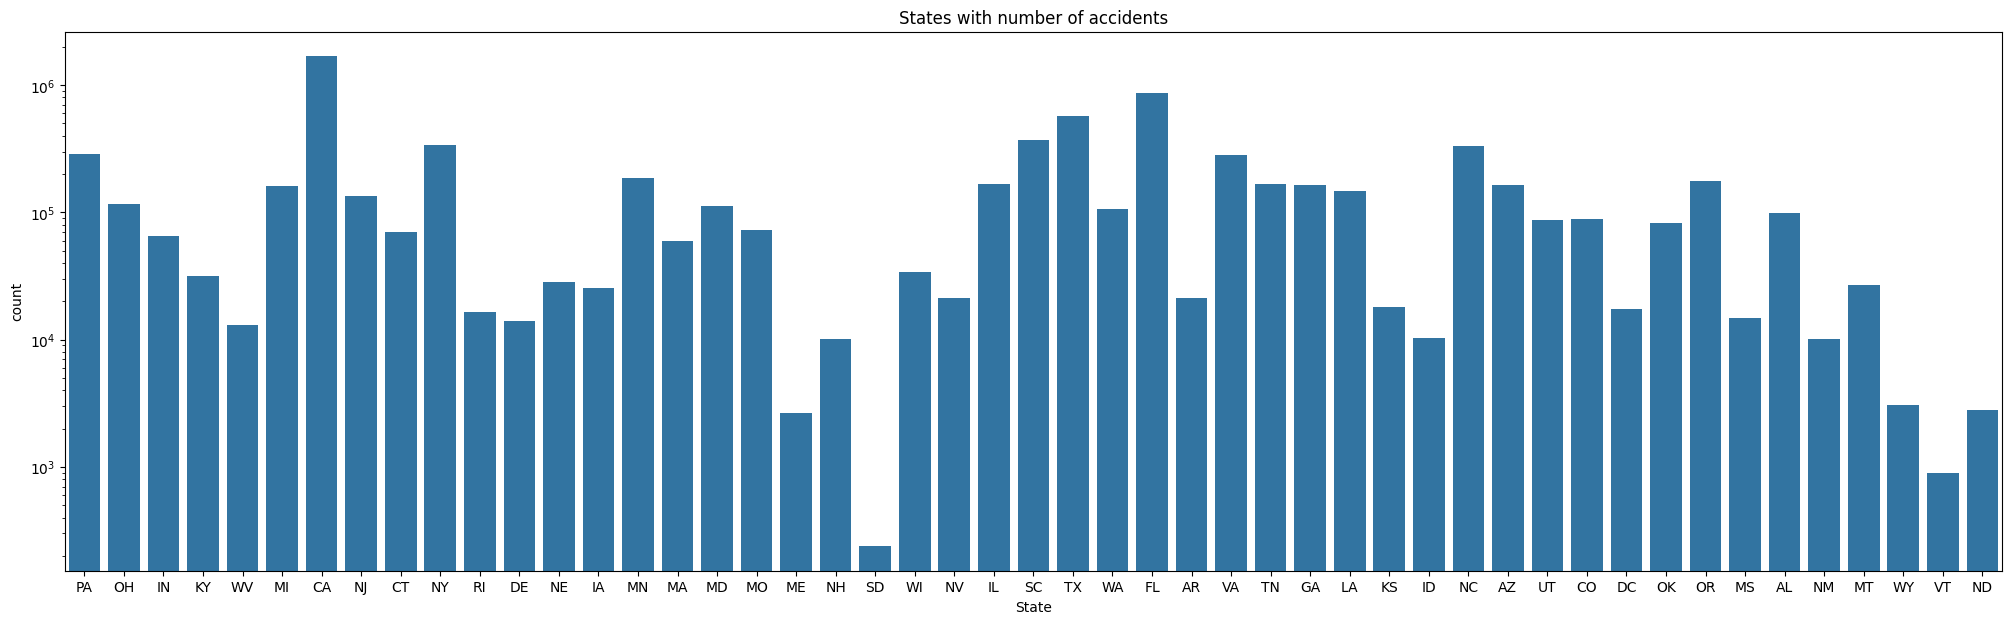

In [32]:
plt.figure(figsize=(25,7))
sns.countplot(x="State",data=ori_data)
plt.yscale("log")
plt.title("States with number of accidents")
plt.show()

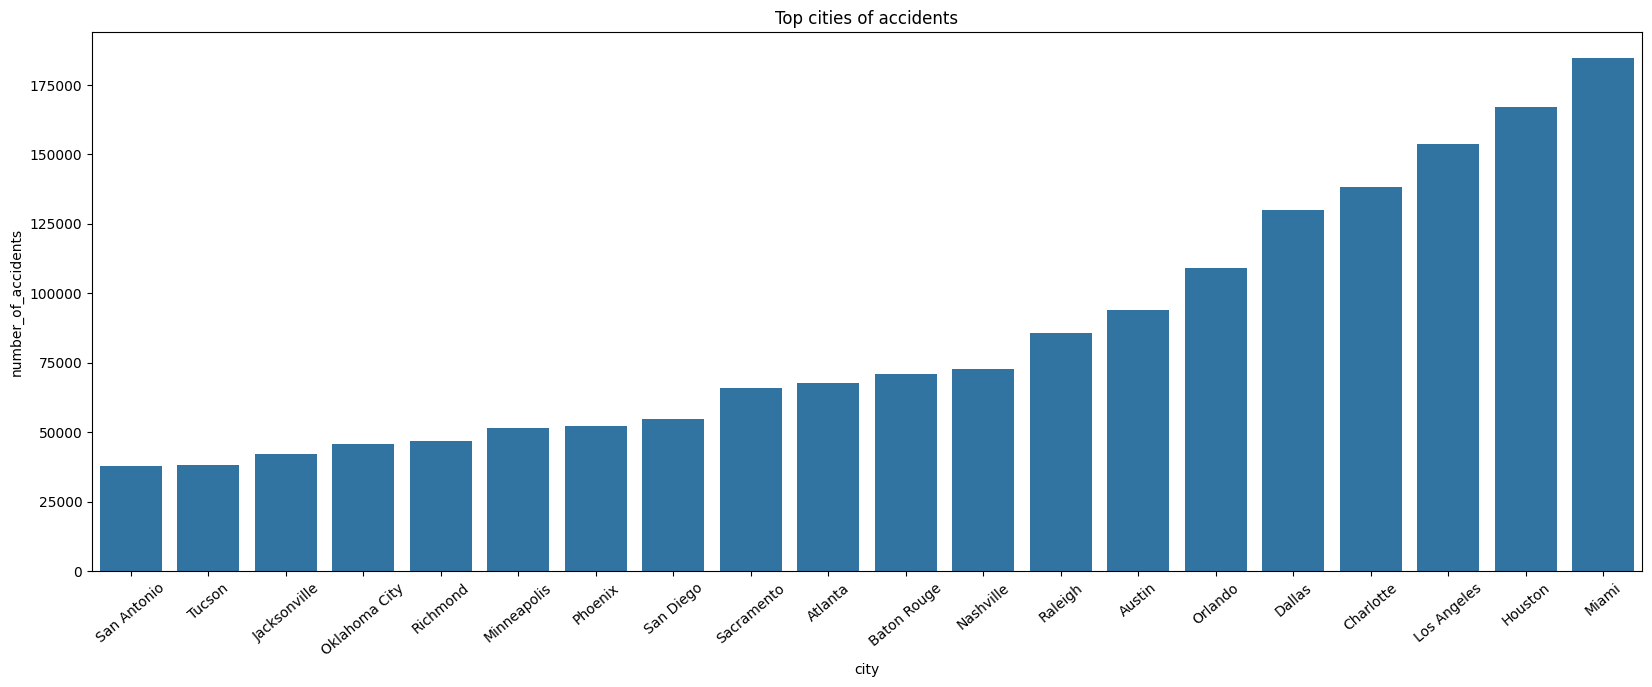

In [33]:
top_cities=ori_data["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

plt.figure(figsize=(20,7))
sns.barplot(x="city",y="number_of_accidents",data=top_cities)
plt.title("Top cities of accidents")
plt.xticks(rotation=40)
plt.show()

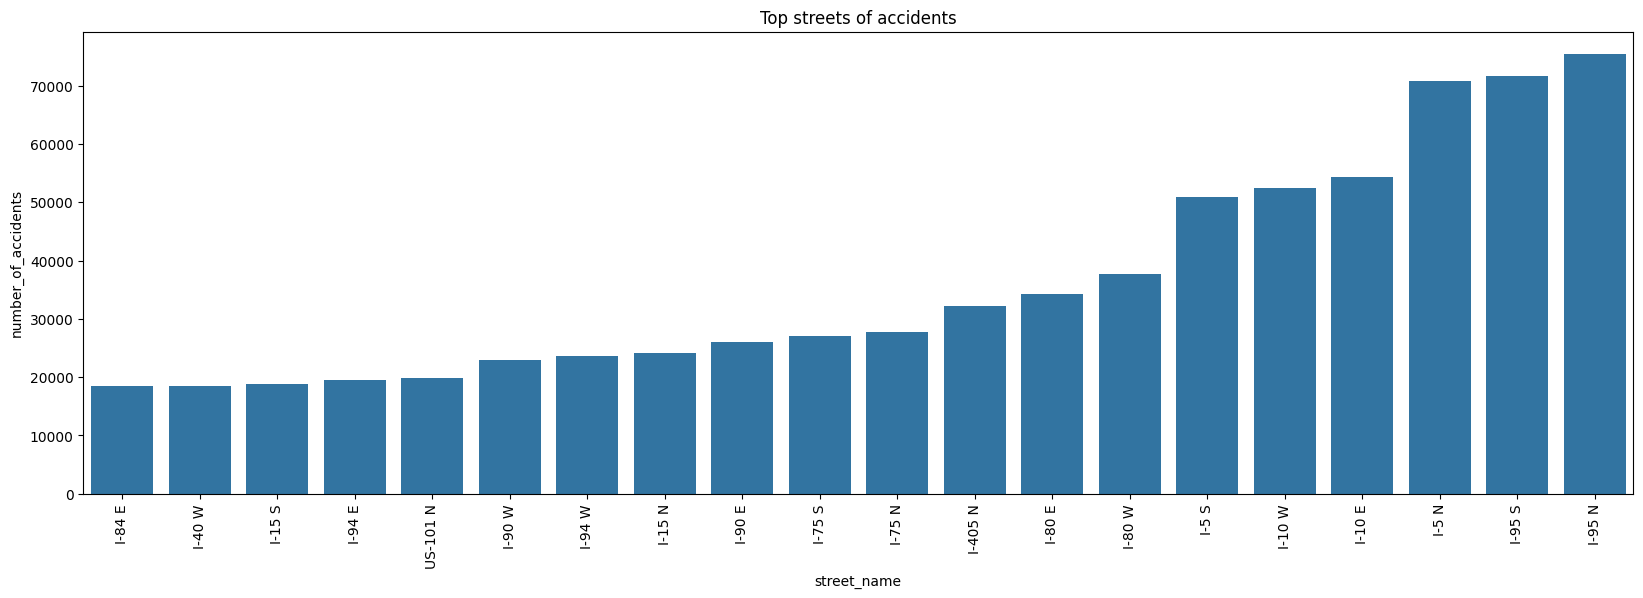

In [34]:
top_streets=ori_data["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

plt.figure(figsize=(20,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("Top streets of accidents")
plt.show()

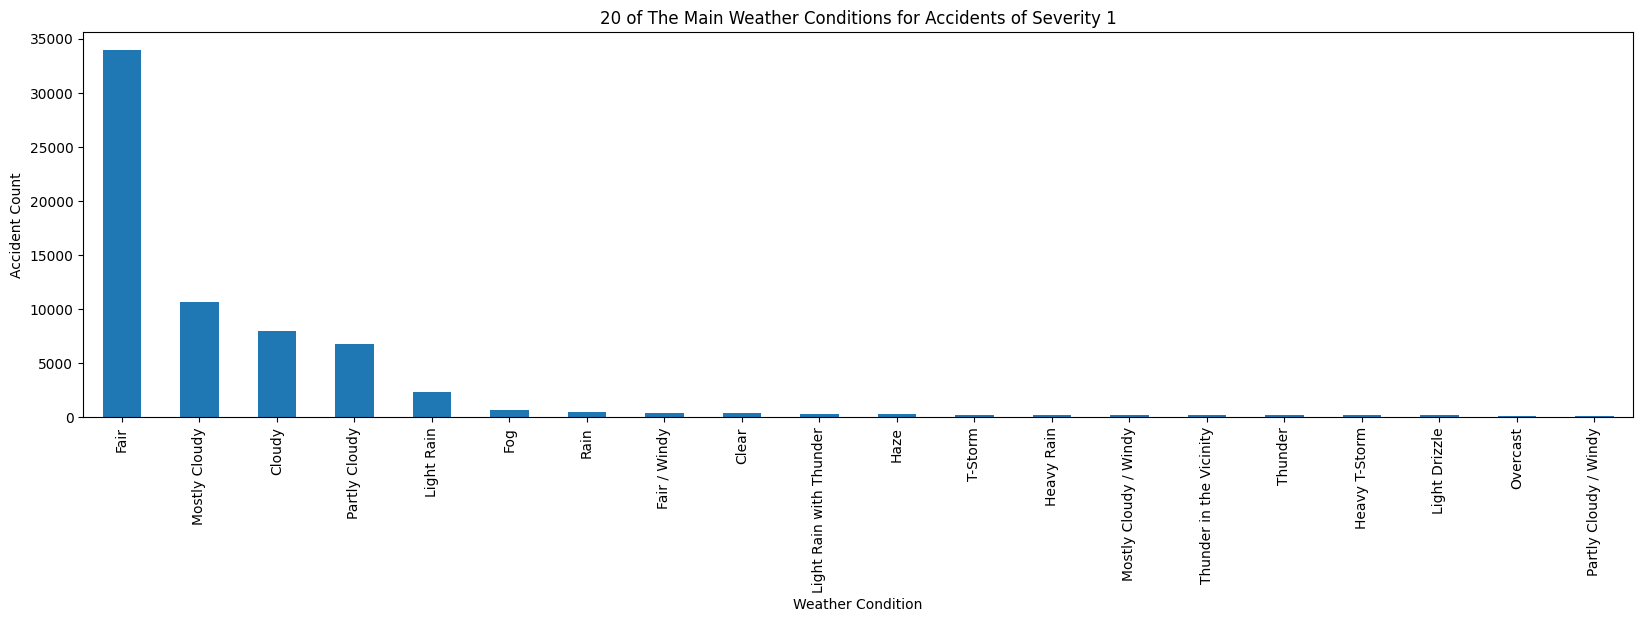

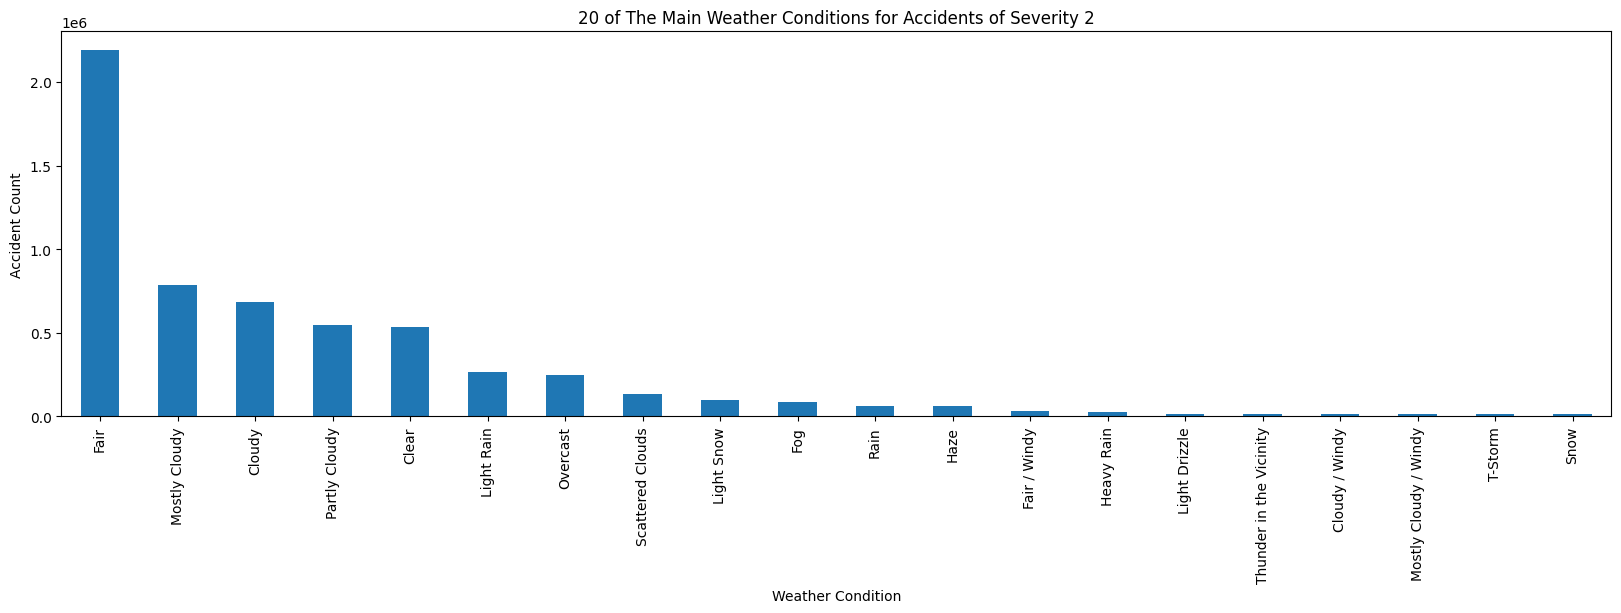

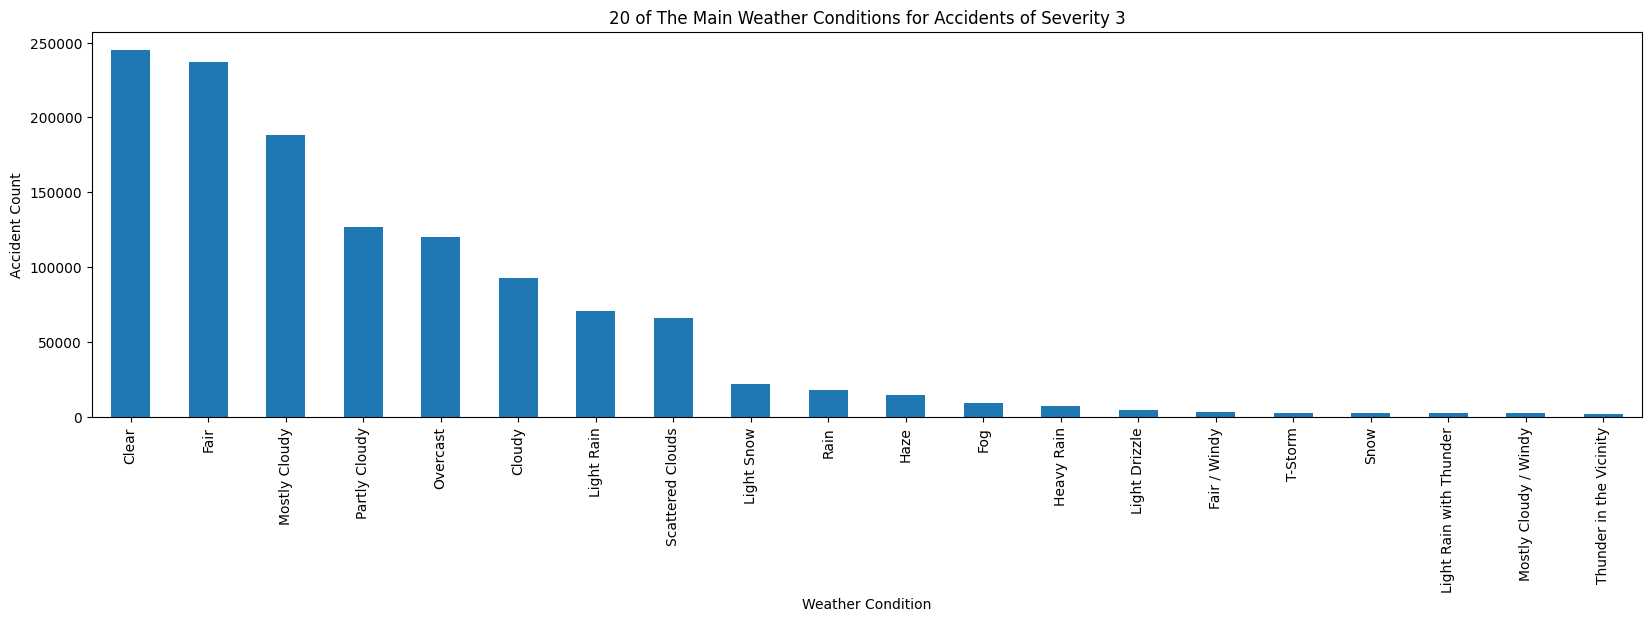

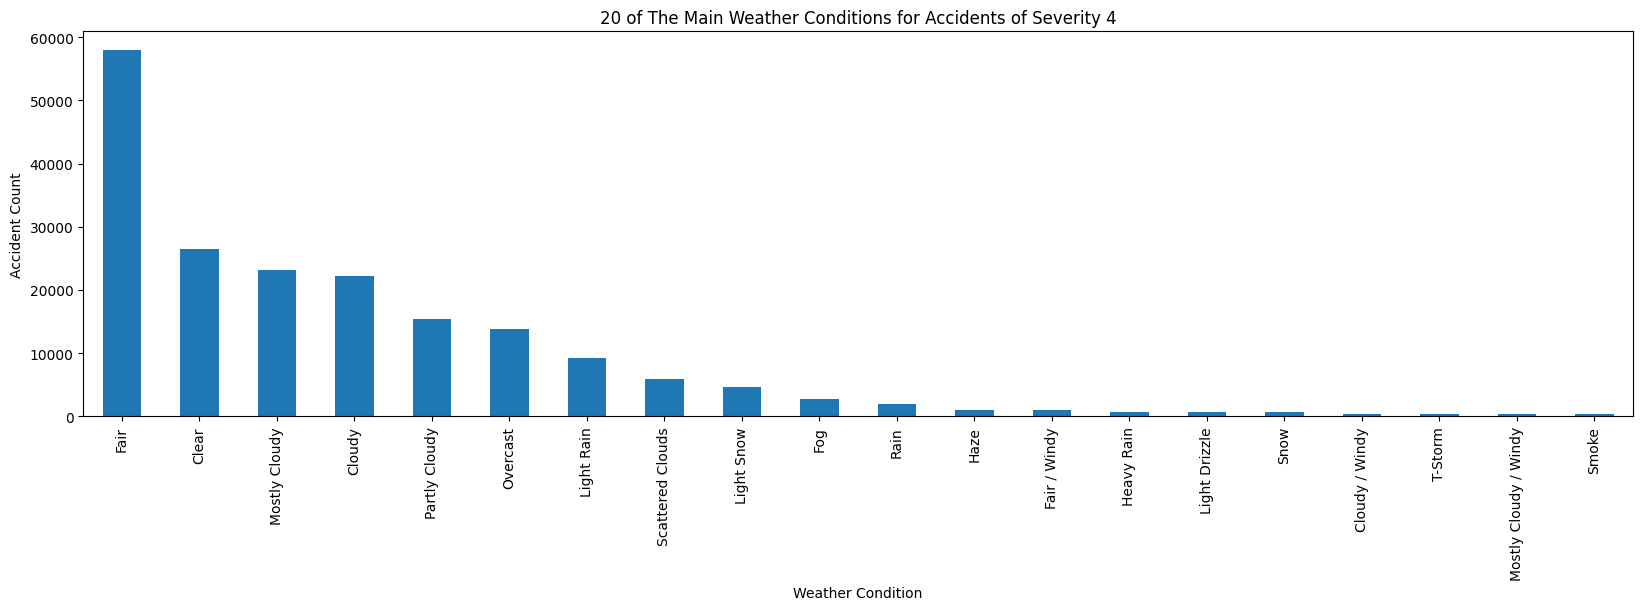

In [35]:
for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    ori_data.loc[ori_data["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar()
    plt.xlabel('Weather Condition')
    plt.ylabel('Accident Count')
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x))
    plt.xticks()
    plt.yticks()

As observed above, Fair, Mostly Cloudly, Clear, and Cloudy are the most frequent weather condition for accidents

Accidents with severity 2 is the most frequent severity which consist nearly 80 percent, while severity 1 is the least frequent severity.

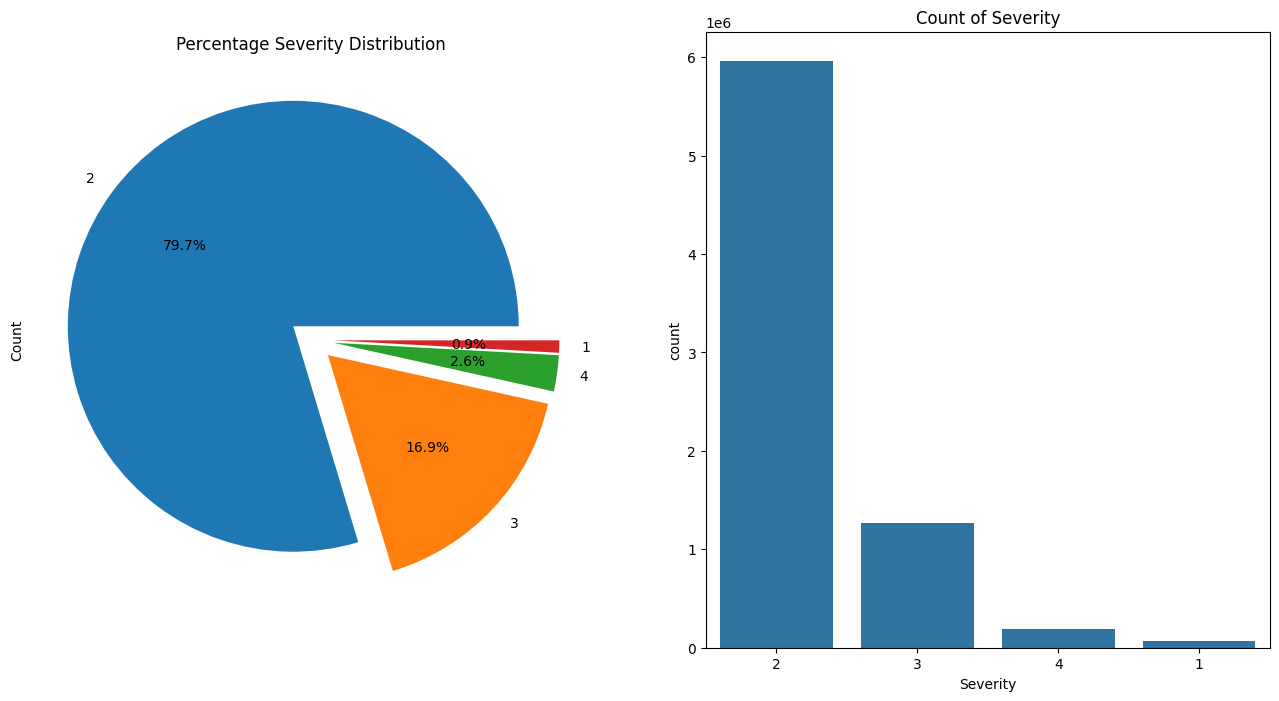

In [36]:
f,ax=plt.subplots(1,2,figsize=(16,8))
ori_data['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot(x='Severity',data=ori_data,ax=ax[1],order=ori_data['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

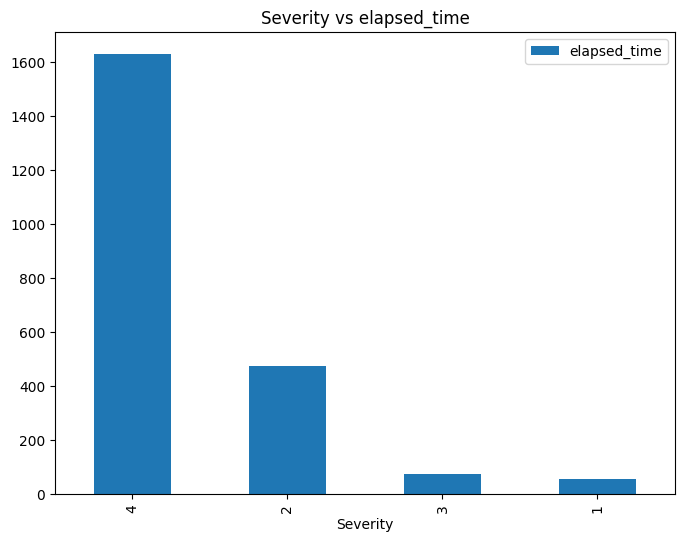

In [37]:
df = pd.DataFrame(ori_data.groupby(['Severity'])['elapsed_time'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Severity vs elapsed_time')
plt.show()

The data for 2023 is not accurate since our latest data is from 2023 march.
Without 2023, we could see that the major severity  level(2) and severity  level 4 is growing consitantly, while severity  level 3 grown from 2016 to 2018 then started to decline.

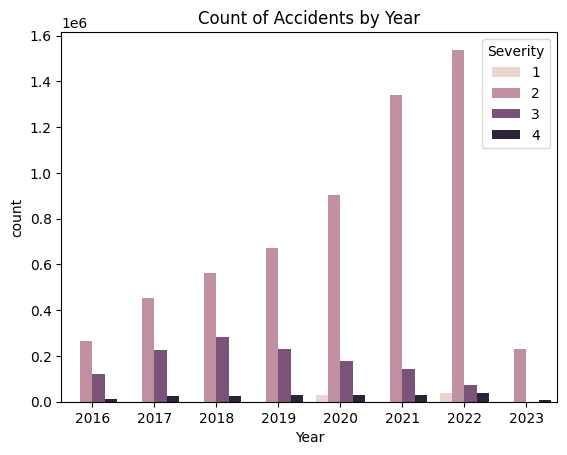

In [38]:
sns.countplot(x='Year', data=ori_data, hue='Severity')
plt.title('Count of Accidents by Year')
plt.show()

The below graph only consist data from 2016 to 2022 since adding data from 2023 will make it inaccurate.
We could observe that month 10~12 is the most frequent month to happen accident while month 3 and 7 is the least frequent month to happen accident. In addition, accidents with severity 1 rarely occur except month 3 ~ 8.

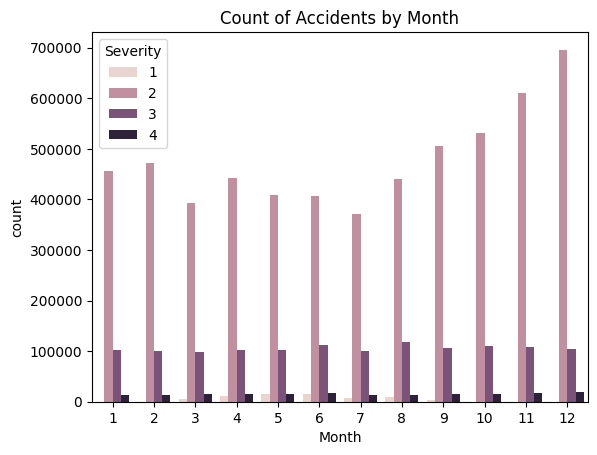

In [39]:
filter_data = ori_data[ori_data['Year'] != 2023]
sns.countplot(x='Month', data=filter_data, hue='Severity')
plt.title('Count of Accidents by Month')
plt.show()

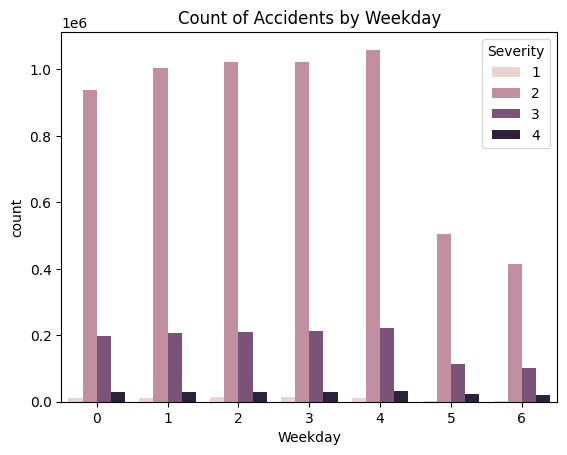

In [40]:
sns.countplot(x='Weekday', data=ori_data, hue='Severity')
plt.title('Count of Accidents by Weekday')
plt.show()

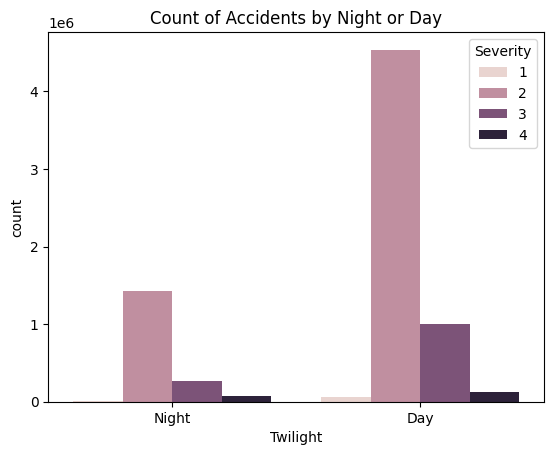

In [41]:
sns.countplot(x='Twilight', data=ori_data, hue='Severity')
plt.xticks([0,1],['Night','Day'])
plt.title('Count of Accidents by Night or Day')
plt.show()

Accidents is more likely to occur in day then night since the traffic in night is usually less than day.

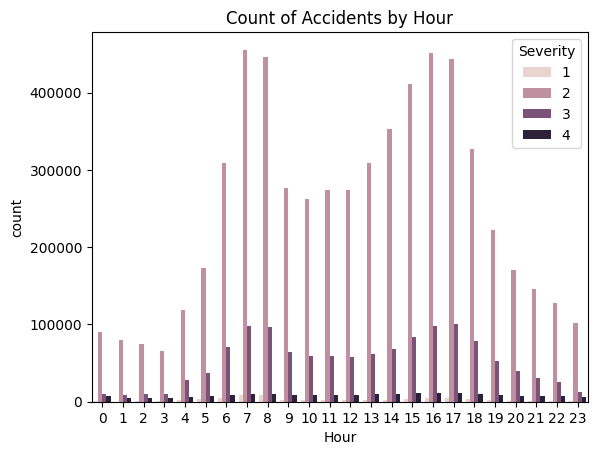

In [42]:
sns.countplot(x='Hour', data=ori_data, hue='Severity')
plt.title('Count of Accidents by Hour')
plt.show()

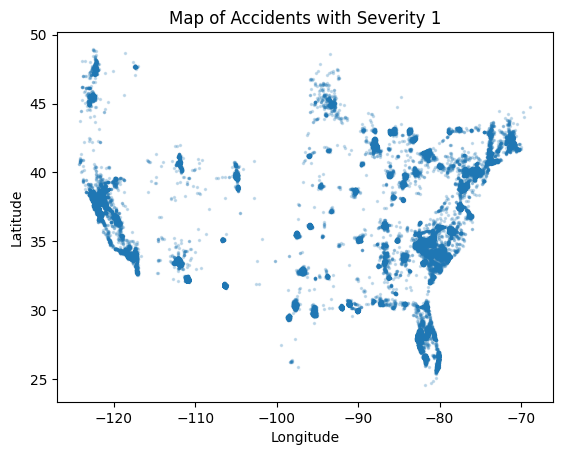

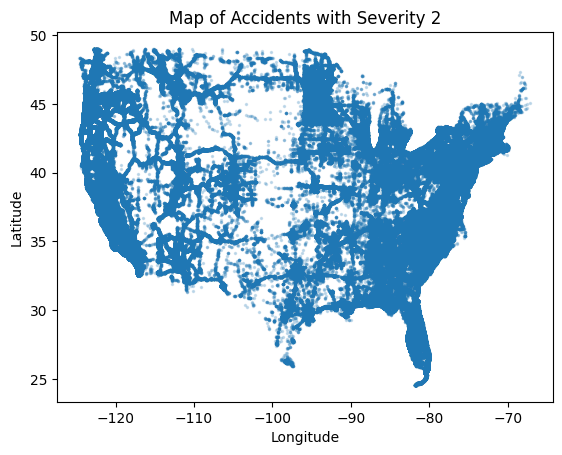

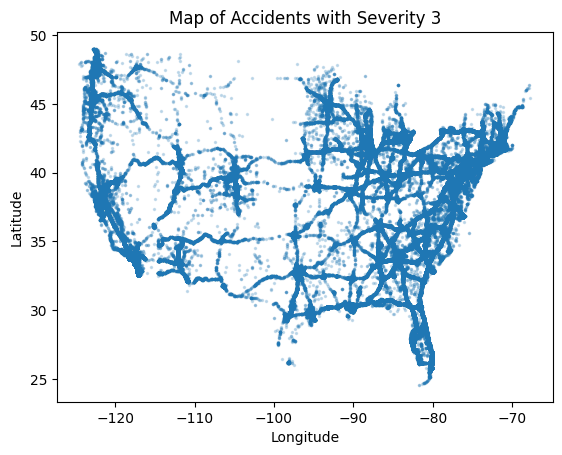

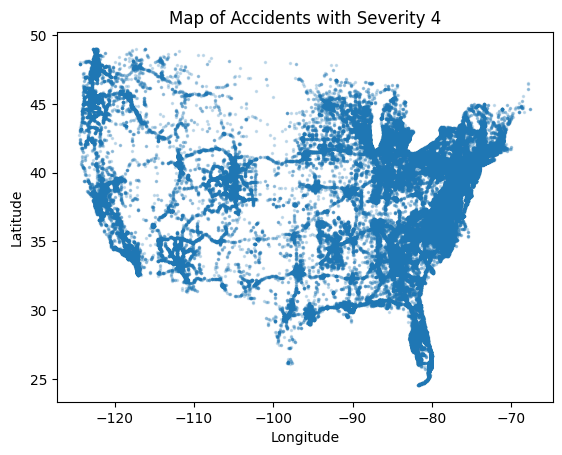

In [43]:
for x in np.arange(1,5):
    # plt.subplots(figsize=(20,5))
    plt.subplots()
    plt.plot( 'Start_Lng', 'Start_Lat', data=ori_data[ori_data['Severity'] == x], linestyle='', marker='o', markersize=1.5, alpha=0.2, label='Accidents with Serverity ' + str(x))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Map of Accidents with Severity ' + str(x))

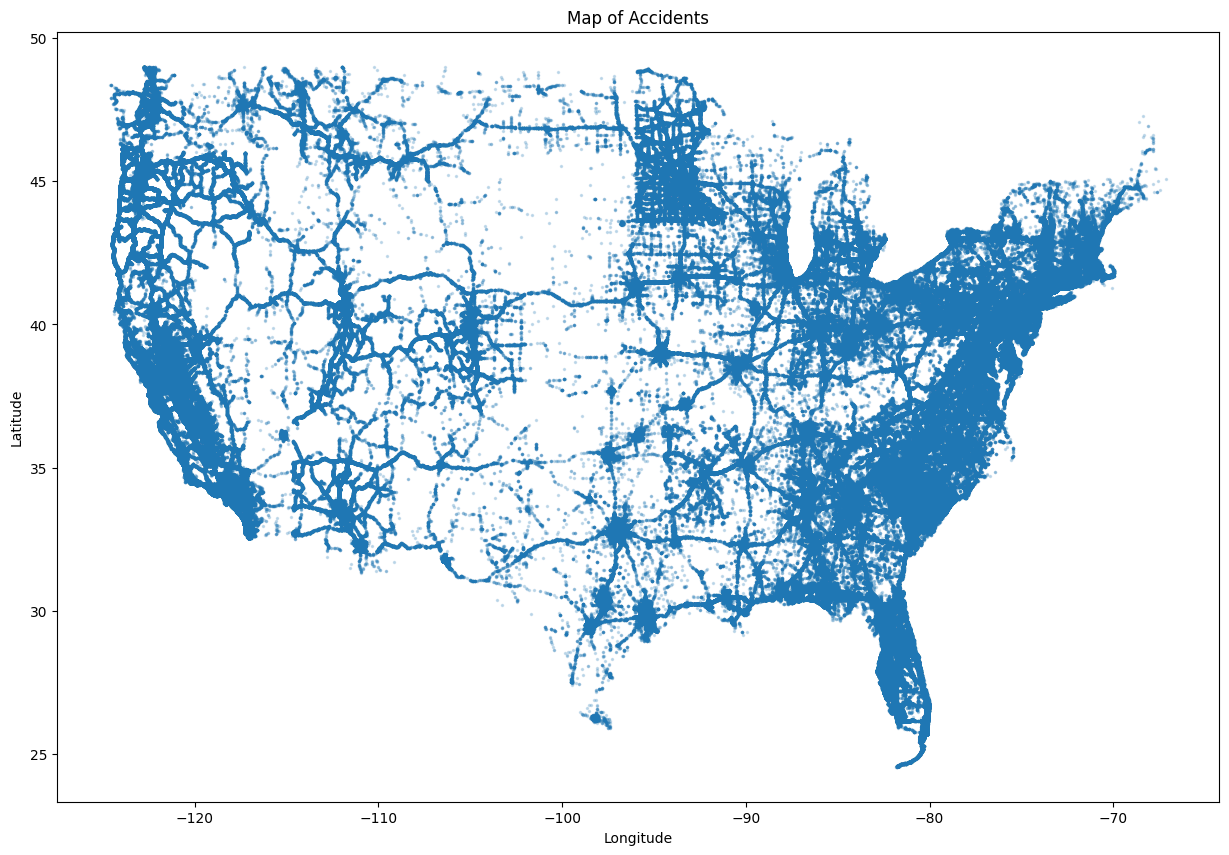

In [44]:
plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=ori_data, linestyle='', marker='o', markersize=1.5, alpha=0.2, label='Accidents with Serverity 1')
# plt.legend(markerscale=8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Accidents')
plt.show()

# Normalization and Standardlization

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

ori_data = pd.read_csv('./data/v2.csv', index_col=False)
ori_data.drop(['Weather_Timestamp', 'ID'], axis=1, inplace=True)
ori_data.head()

,Unnamed: 0,Twilight,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,3571330,0,4,2016-01-14 20:18:33,2017-03-17 22:49:03,40.630609,-75.470606,0.061,US-22 E,Whitehall,...,False,False,False,False,False,0,0,0,0,616470.500000
1,3562512,0,4,2016-01-14 20:18:33,2017-02-19 00:38:00,40.630609,-75.470606,0.061,US-22 E,Whitehall,...,False,False,False,False,False,0,0,0,0,577699.450000
2,3562358,0,4,2016-01-14 20:18:33,2017-02-17 23:22:00,40.630609,-75.470606,0.061,US-22 E,Whitehall,...,False,False,False,False,False,0,0,0,0,576183.450000
3,3548830,0,4,2016-01-14 20:18:33,2017-01-30 13:55:44,40.630609,-75.470606,0.061,US-22 E,Whitehall,...,False,False,False,False,False,0,0,0,0,549697.183333
4,3548817,0,4,2016-01-14 20:18:33,2017-01-30 13:34:02,40.630609,-75.470606,0.061,US-22 E,Whitehall,...,False,False,False,False,False,0,0,0,0,549675.483333


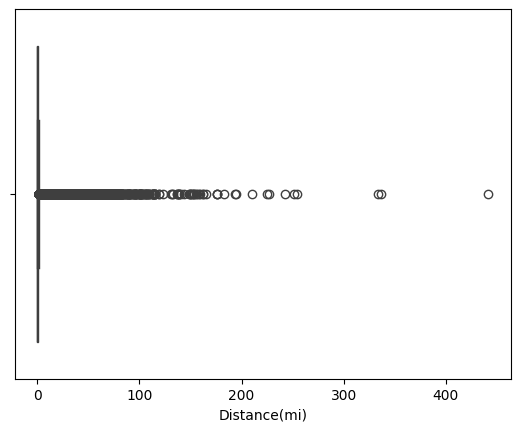

count   7484058.00000
mean          0.55481
std           1.75931
min           0.00000
25%           0.00000
50%           0.02700
75%           0.45500
max         441.75000
Name: Distance(mi), dtype: float64

In [2]:
pd.set_option('display.float_format', '{:.5f}'.format)
sns.boxplot(x=ori_data['Distance(mi)'])
plt.show()
ori_data['Distance(mi)'].describe()

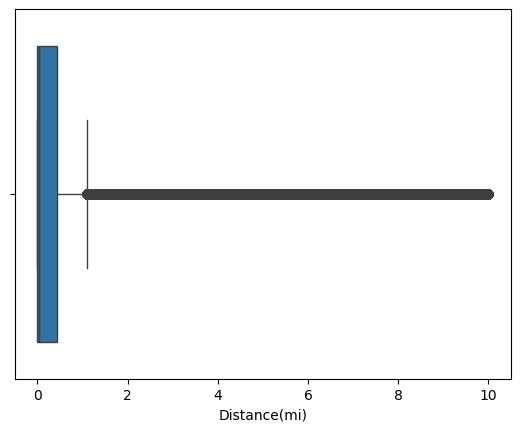

7450438

In [3]:
ori_data = ori_data[ori_data['Distance(mi)']<10]
sns.boxplot(x=ori_data['Distance(mi)'])
plt.show()
ori_data.shape[0]

In [4]:
categorical_columns = ori_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Start_Time', 'End_Time', 'Street', 'City', 'County', 'State',
       'Wind_Direction', 'Weather_Condition'],
      dtype='object')

In [5]:
label_encoder = preprocessing.LabelEncoder()
for column in categorical_columns:
    ori_data[column] = label_encoder.fit_transform(ori_data[column])

ori_data.head()

,Unnamed: 0,Twilight,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,3571330,0,4,0,487786,40.63061,-75.47061,0.06100,309187,11881,...,False,False,False,False,False,0,0,0,0,616470.50000
1,3562512,0,4,0,443865,40.63061,-75.47061,0.06100,309187,11881,...,False,False,False,False,False,0,0,0,0,577699.45000
2,3562358,0,4,0,443088,40.63061,-75.47061,0.06100,309187,11881,...,False,False,False,False,False,0,0,0,0,576183.45000
3,3548830,0,4,0,409765,40.63061,-75.47061,0.06100,309187,11881,...,False,False,False,False,False,0,0,0,0,549697.18333
4,3548817,0,4,0,409729,40.63061,-75.47061,0.06100,309187,11881,...,False,False,False,False,False,0,0,0,0,549675.48333


In [6]:
boolean_columns = ori_data.select_dtypes(include=['bool']).columns
boolean_columns

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal'],
      dtype='object')

In [7]:
for column in boolean_columns:
    ori_data[column] = ori_data[column].astype(int)


ori_data.head()

,Unnamed: 0,Twilight,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,3571330,0,4,0,487786,40.63061,-75.47061,0.06100,309187,11881,...,0,0,0,0,0,0,0,0,0,616470.50000
1,3562512,0,4,0,443865,40.63061,-75.47061,0.06100,309187,11881,...,0,0,0,0,0,0,0,0,0,577699.45000
2,3562358,0,4,0,443088,40.63061,-75.47061,0.06100,309187,11881,...,0,0,0,0,0,0,0,0,0,576183.45000
3,3548830,0,4,0,409765,40.63061,-75.47061,0.06100,309187,11881,...,0,0,0,0,0,0,0,0,0,549697.18333
4,3548817,0,4,0,409729,40.63061,-75.47061,0.06100,309187,11881,...,0,0,0,0,0,0,0,0,0,549675.48333


In [8]:
target=ori_data["Severity"]
x=ori_data.drop(columns=["Severity"])
x

,Unnamed: 0,Twilight,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time
0,3571330,0,0,487786,40.63061,-75.47061,0.06100,309187,11881,882,...,0,0,0,0,0,0,0,0,0,616470.50000
1,3562512,0,0,443865,40.63061,-75.47061,0.06100,309187,11881,882,...,0,0,0,0,0,0,0,0,0,577699.45000
2,3562358,0,0,443088,40.63061,-75.47061,0.06100,309187,11881,882,...,0,0,0,0,0,0,0,0,0,576183.45000
3,3548830,0,0,409765,40.63061,-75.47061,0.06100,309187,11881,882,...,0,0,0,0,0,0,0,0,0,549697.18333
4,3548817,0,0,409729,40.63061,-75.47061,0.06100,309187,11881,882,...,0,0,0,0,0,0,0,0,0,549675.48333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7484053,3649166,0,5631849,6261581,32.90906,-96.73222,0.69700,220176,2550,403,...,0,0,0,0,0,0,0,0,0,18.50000
7484054,3677613,0,5631847,6261590,41.57782,-87.56215,0.18800,219873,5825,357,...,0,0,0,0,0,0,0,0,0,30.00000
7484055,3656485,0,5631846,6261563,46.66544,-92.47449,0.76200,219899,1587,242,...,0,0,0,0,0,0,0,0,0,14.50000
7484056,3662007,0,5631853,6261601,42.41917,-83.08851,0.91100,176584,4809,1661,...,0,0,0,0,0,0,0,0,0,23.00000


In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
ori_data.to_csv('./data/v3.csv', index = False)

# Predict

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [3]:
ori_data = pd.read_csv('./data/v3.csv', index_col=False)

In [4]:
X = ori_data.drop(['Severity'], axis=1)
y = ori_data['Severity']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x_train, y_train)
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_res)))
print(len(x_train), len(x_res))

Distribution of class labels before resampling Counter({2: 4754033, 3: 1002162, 4: 151561, 1: 52594})
Distribution of class labels after resampling Counter({1: 52594, 2: 52594, 3: 52594, 4: 52594})
5960350 210376


In [17]:
dt = DecisionTreeClassifier(max_depth=16)
dt.fit(x_res, y_res)
y_pred = dt.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.30      0.95      0.45     13031
           2       0.97      0.70      0.81   1188776
           3       0.53      0.80      0.64    250247
           4       0.15      0.80      0.25     38034

    accuracy                           0.72   1490088
   macro avg       0.49      0.81      0.54   1490088
weighted avg       0.87      0.72      0.77   1490088



In [5]:
clf = RandomForestClassifier()
clf.fit(x_res, y_res)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.30      0.97      0.46     13031
           2       0.98      0.72      0.83   1188776
           3       0.55      0.82      0.66    250247
           4       0.17      0.86      0.28     38034

    accuracy                           0.74   1490088
   macro avg       0.50      0.84      0.55   1490088
weighted avg       0.88      0.74      0.78   1490088

